2024-04-24 08:57:54.246441: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 08:57:54.578986: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 08:57:54.757702: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 08:57:55.955430: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


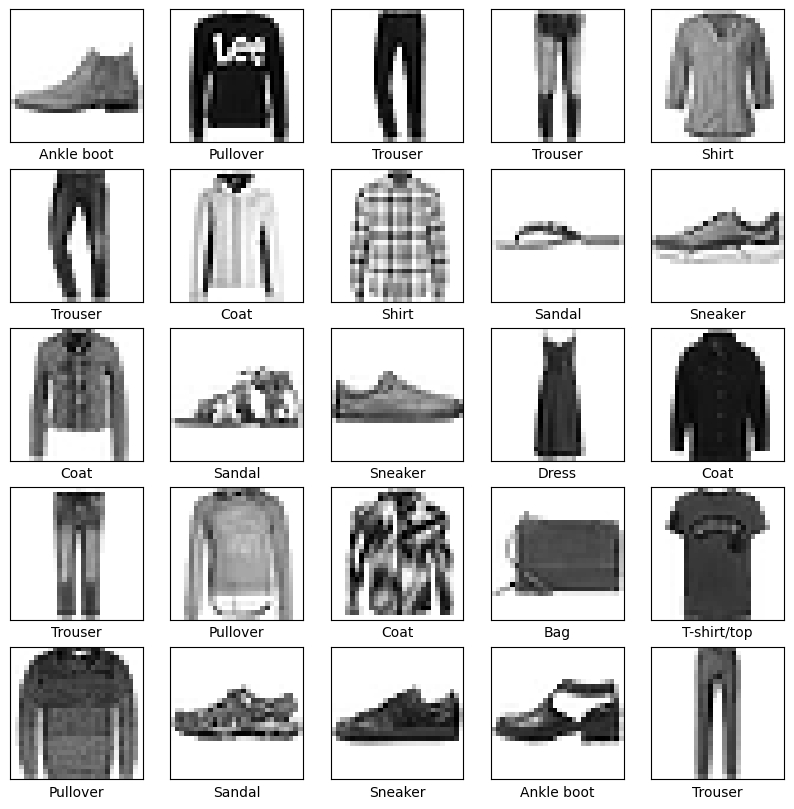

In [2]:
#pip install tensorflow

import gzip
import struct
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 데이터 불러오기 함수
def load_data(image_file, label_file):
    with gzip.open(image_file, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)
    
    with gzip.open(label_file, 'rb') as f:
        magic, num_labels = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    
    return images, labels

# 데이터셋 로드
test_images, test_labels = load_data('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

# 데이터 전처리: 이미지 데이터 스케일 조정 [0, 1]로 변환
test_images = test_images.astype('float32') / 255.0

# 데이터 분할: 70%는 훈련 데이터, 30%는 테스트 데이터
split_index = int(len(test_images) * 0.7)
train_images, train_labels = test_images[:split_index], test_labels[:split_index]
test_images, test_labels = test_images[split_index:], test_labels[split_index:]

# Fashion-MNIST 클래스 레이블
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 이미지와 레이블을 시각화
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [3]:
# 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=5, batch_size=32, validation_split=0.2)



/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6498 - loss: 1.0225 - val_accuracy: 0.7957 - val_loss: 0.5551
Epoch 2/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8317 - loss: 0.4827 - val_accuracy: 0.8229 - val_loss: 0.4550
Epoch 3/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8528 - loss: 0.4129 - val_accuracy: 0.8271 - val_loss: 0.4748
Epoch 4/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8701 - loss: 0.3556 - val_accuracy: 0.8507 - val_loss: 0.4029
Epoch 5/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8977 - loss: 0.3011 - val_accuracy: 0.8279 - val_loss: 0.4402


94/94 - 0s - 4ms/step - accuracy: 0.8477 - loss: 0.4089

테스트 정확도: 0.8476666808128357
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


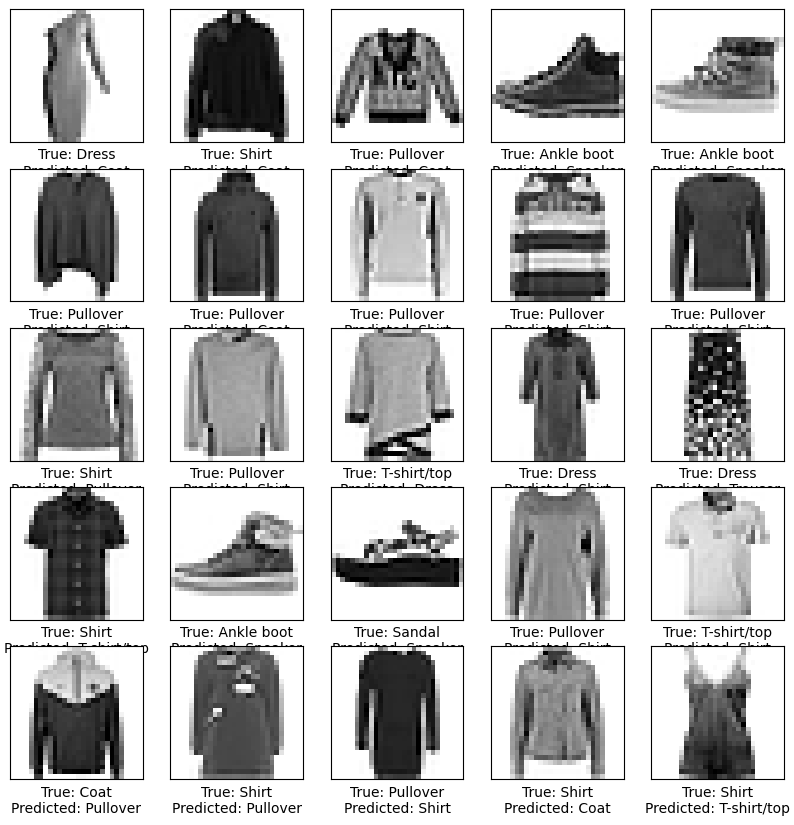

In [4]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)
print("\n테스트 정확도:", test_accuracy)

# 테스트 데이터에 대한 예측
predictions = model.predict(test_images[..., np.newaxis])
predicted_labels = np.argmax(predictions, axis=1)

# 잘못 분류된 이미지 찾기
misclassified_index = np.where(predicted_labels != test_labels)[0]

# 잘못 분류된 이미지 시각화
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_index[:25]):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.xlabel(f"True: {class_names[test_labels[index]]}\nPredicted: {class_names[predicted_labels[index]]}")
plt.show()
